# **Mitigating Loan Default Risk: Leveraging Predictive Analytics for Smarter Lending Decisions**

        By Qemhal Haritskhayru

**Business Background**

In today’s competitive financial landscape, the loan industry plays a critical role in enabling individuals and businesses to achieve their financial goals, from home purchases to education and business ventures. However, with this opportunity comes significant risk—loan defaults can severely impact a financial institution’s profitability and long-term viability. As lending institutions strive to increase loan approval rates and expand their customer base, they must also mitigate the risk of lending to customers who are likely to default.

The key challenge in the lending process is accurately assessing the creditworthiness of potential borrowers. Traditional methods, relying solely on credit scores or basic financial indicators, are no longer sufficient to capture the complexity of today’s borrower profiles. Customers’ employment history, loan intent, credit history length, and financial ratios (like loan amount relative to income) all contribute to the likelihood of a successful loan repayment or default. Therefore, banks and financial institutions need more advanced data-driven approaches to evaluate the risk of default while still ensuring they approve loans for deserving customers.

Given the rapidly changing economic conditions and the increasing amount of data available, machine learning offers a powerful tool to predict borrower risk with high accuracy. By leveraging detailed customer data and predictive models, financial institutions can make more informed lending decisions, reducing the costs associated with defaults and improving overall profitability. This project aims to use advanced analytics to identify key risk factors and build a predictive model that optimizes loan approval processes while minimizing the financial losses associated with defaults.

**Problem Statement**
The financial institution faces a critical challenge in balancing loan approvals with the risk of customer default. While approving loans increases revenue and customer satisfaction, approving loans to customers likely to default can result in significant financial losses. The current manual or traditional credit evaluation methods are insufficient in identifying at-risk customers with high precision.

This project aims to leverage customer data, including factors such as income, employment length, loan intent, and credit history, to build a predictive machine learning model. The model will assess the likelihood of default, enabling more informed loan approval decisions. The primary goal is to minimize the cost of lending to high-risk customers by reducing the number of defaults through precise identification and assessment of risk.

In [1]:
# Data Cleaning and Analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

# 1. Data Understanding

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
print(f'The data containt {df.duplicated().sum()} duplicates.')

The data containt 0 duplicates.


| **Column Name**                 | **Description**                                                                   |
|----------------------------------|-----------------------------------------------------------------------------------|
| `person_age`                     | Age of the customer (int)                                                         |
| `person_income`                  | Customer's annual income (int)                                                    |
| `person_home_ownership`          | Customer's home ownership status (rent, mortgage, own, other) (object)            |
| `person_emp_length`              | Length of customer's employment in years (float)                                  |
| `loan_intent`                    | Purpose of the loan (education, medical, personal, venture, debt consolidation, home improvement) |
| `loan_grade`                     | Grade of the loan package (A, B, C, D, E, F, G)                                   |
| `loan_amnt`                      | Amount of loan requested by the customer (int)                                    |
| `loan_int_rate`                  | Interest rate of the loan (float)                                                 |
| `loan_percent_income`            | Ratio of loan amount to customer income (float)                                   |
| `cb_person_default_on_file`      | Whether the customer has defaulted before (N = No, Y = Yes) (object)              |
| `cb_person_cred_hist_length`     | Length of customer's credit history in years (int)                                |
| `loan_status`                    | Loan status (0 = Not Default, 1 = Default)                  |


# 2. Exploratory Data Analysis

In [6]:
pd.set_option('display.float_format', '{:.4f}'.format)
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.0000,58645.0000,58645.0000,58645.0000,58645.0000,58645.0000,58645.0000,58645.0000,58645.0000
mean,29322.0000,27.5509,64046.1729,4.7010,9217.5565,10.6779,0.1592,5.8136,0.1424
std,16929.4976,6.0332,37931.1070,3.9598,5563.8074,3.0347,0.0917,4.0292,0.3494
min,0.0000,20.0000,4200.0000,0.0000,500.0000,5.4200,0.0000,2.0000,0.0000
25%,14661.0000,23.0000,42000.0000,2.0000,5000.0000,7.8800,0.0900,3.0000,0.0000
50%,29322.0000,26.0000,58000.0000,4.0000,8000.0000,10.7500,0.1400,4.0000,0.0000
75%,43983.0000,30.0000,75600.0000,7.0000,12000.0000,12.9900,0.2100,8.0000,0.0000
max,58644.0000,123.0000,1900000.0000,123.0000,35000.0000,23.2200,0.8300,30.0000,1.0000


In [7]:
# Carachteristics of each columns

pd.DataFrame({
    'columns'           : df.columns.values,
    'data_type'         : df.dtypes.values,
    'null_value'        : df.isna().sum(),
    'duplicate'         : df.duplicated().sum(),
    'n_unique'          : df.nunique().values,
    'unique_values'     : [df[col].unique() for col in df.columns]
}).reset_index(drop=True)

,columns,data_type,null_value,duplicate,n_unique,unique_values
0,id,int64,0,0,58645,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,person_age,int64,0,0,53,"[37, 22, 29, 30, 27, 25, 21, 35, 31, 26, 28, 3..."
2,person_income,int64,0,0,2641,"[35000, 56000, 28800, 70000, 60000, 45000, 200..."
3,person_home_ownership,object,0,0,4,"[RENT, OWN, MORTGAGE, OTHER]"
4,person_emp_length,float64,0,0,36,"[0.0, 6.0, 8.0, 14.0, 2.0, 9.0, 11.0, 5.0, 1.0..."
5,loan_intent,object,0,0,6,"[EDUCATION, MEDICAL, PERSONAL, VENTURE, DEBTCO..."
6,loan_grade,object,0,0,7,"[B, C, A, D, E, F, G]"
7,loan_amnt,int64,0,0,545,"[6000, 4000, 12000, 9000, 2500, 5000, 15000, 1..."
8,loan_int_rate,float64,0,0,362,"[11.49, 13.35, 8.9, 11.11, 6.92, 8.94, 6.54, 1..."
9,loan_percent_income,float64,0,0,61,"[0.17, 0.07, 0.21, 0.1, 0.2, 0.27, 0.13, 0.14,..."


In [8]:
cat_col = []
num_col = []
for column in df.columns:
    if df[column].dtype == object:
        cat_col.append(column)
    else:
        num_col.append(column)

display(cat_col, num_col)

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

['id',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status']

In [9]:
num_col.remove('id')

In [10]:
def check_outliers(data, column):
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers_df = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers_df, lower_bound, upper_bound

In [11]:
outlier_data = []

for i in num_col:
    outliers_result, lower_bound, upper_bound = check_outliers(df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier / len(df[i]) * 100, 2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=[
    'column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'
])

outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,person_age,2446,4.1700,12.5000,40.5000
1,person_income,2411,4.1100,-8400.0000,126000.0000
2,person_emp_length,1274,2.1700,-5.5000,14.5000
3,loan_amnt,2045,3.4900,-5500.0000,22500.0000
4,loan_int_rate,34,0.0600,0.2150,20.6550
5,loan_percent_income,1210,2.0600,-0.0900,0.3900
6,cb_person_cred_hist_length,1993,3.4000,-4.5000,15.5000
7,loan_status,8350,14.2400,0.0000,0.0000


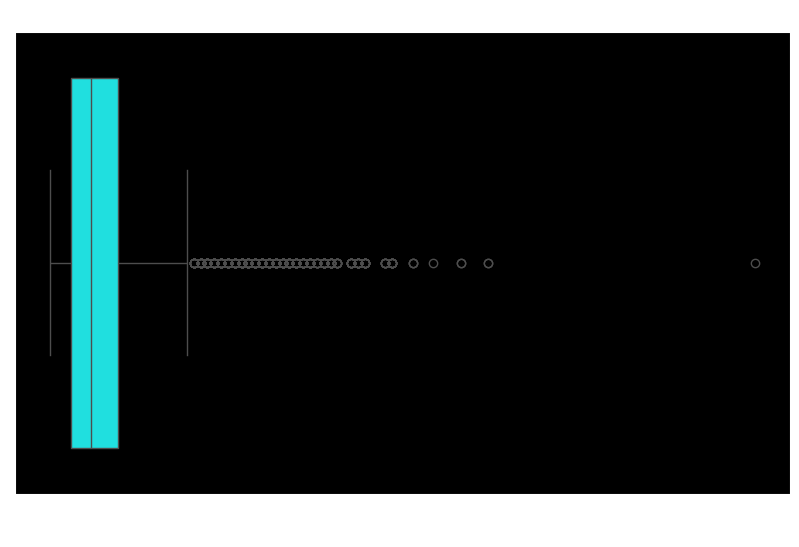

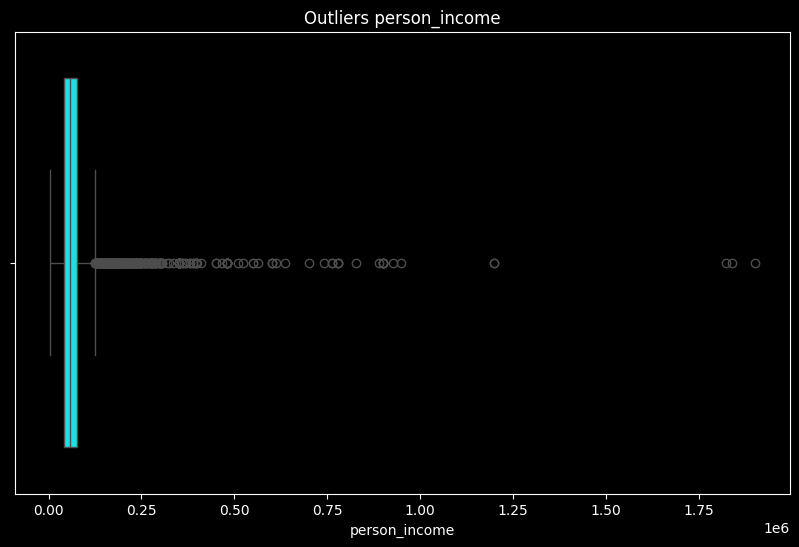

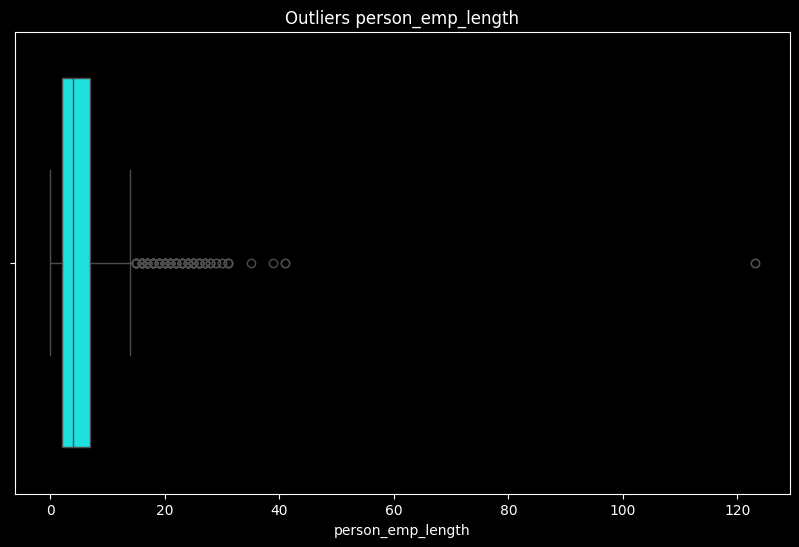

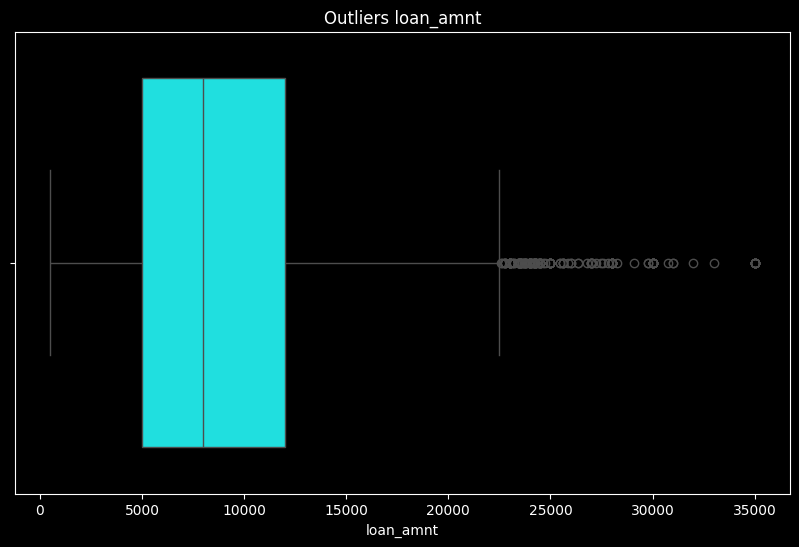

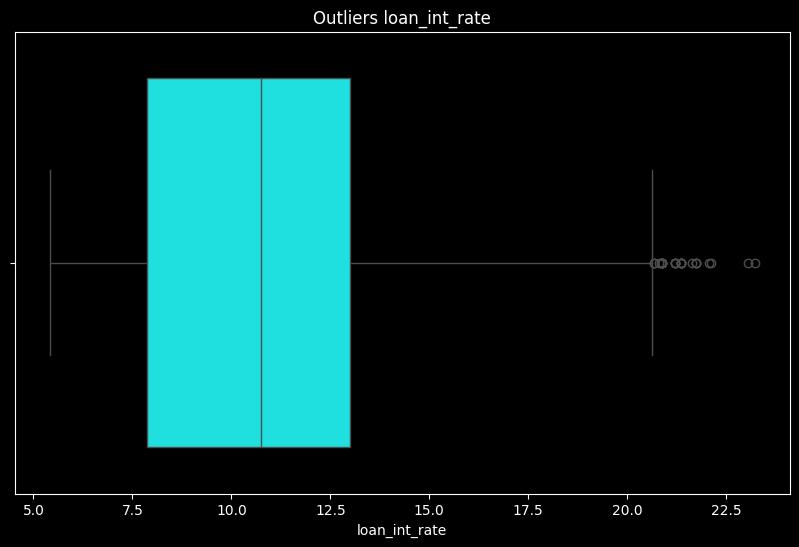

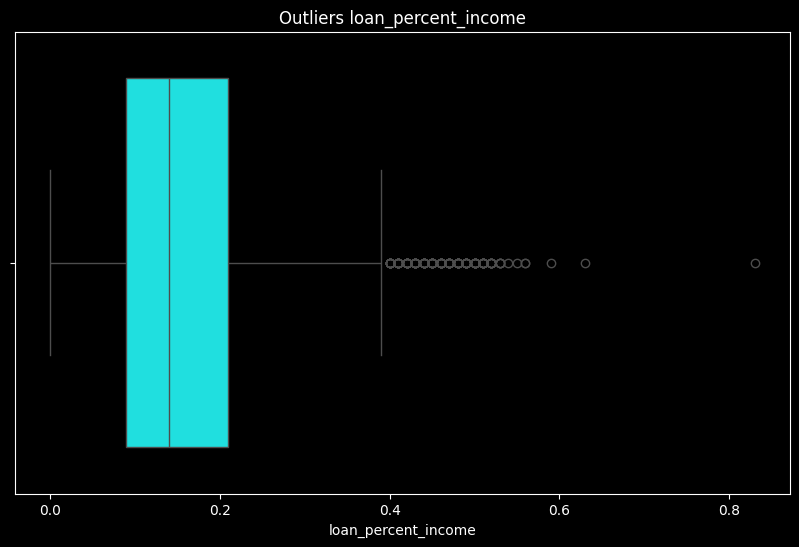

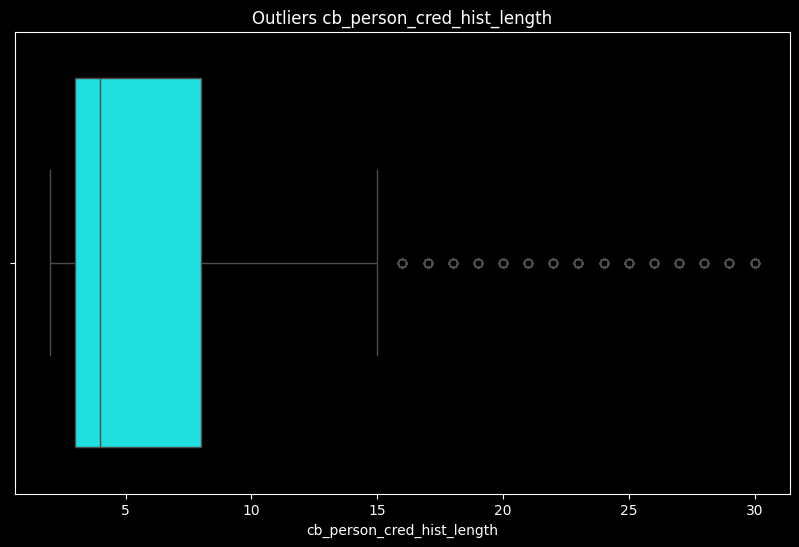

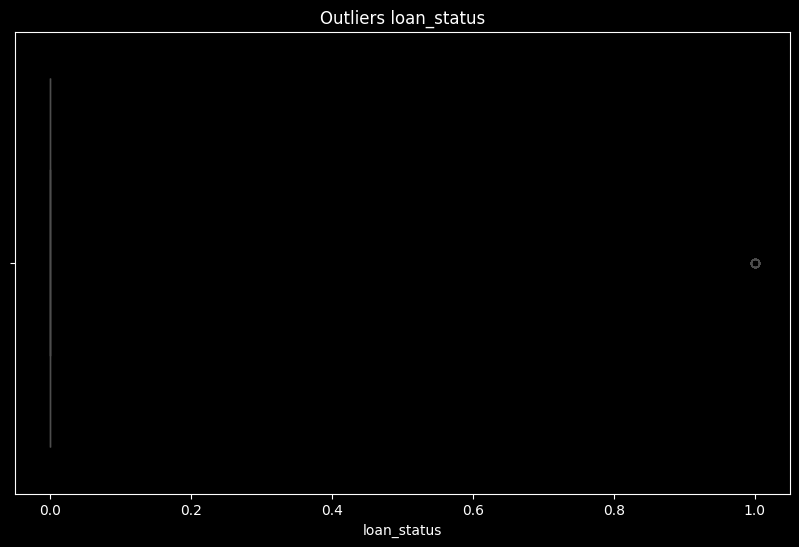

In [12]:
for col in num_col:
    plt.figure(figsize=(10, 6))
    plt.style.use('dark_background')
    sns.boxplot(data=df, x=col, color='cyan')
    plt.title(f'Outliers {col}', color='white')
    plt.show()

Insights :
1. We have **58645** of customer data.
2. The **maximum person age is 123 years old**, which need to be investigated whether that is a real data or a miss input.
3. There are a couple of person that have a **really high income**.
4. In person employment length the maximum is **123 years**, which can be a miss input data.
5. There are **0 percent** of loan to income ratio in some customers which need to be investigated further.
6. **Outlier** are present but decided not to eliminate if it's a real data.

## 2.1 Data Cleaning

In [13]:
df[df['person_age'] == 123]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
47336,47336,123,36000,MORTGAGE,7.0000,PERSONAL,B,6700,10.7500,0.1800,N,4,0


In [14]:
df[df['person_emp_length'] == 123]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,41079,28,60350,MORTGAGE,123.0000,MEDICAL,D,25000,15.9500,0.3500,Y,6,1
49252,49252,21,192000,MORTGAGE,123.0000,VENTURE,B,20000,11.4900,0.1000,N,2,0


If we look at the data it look like it could be false or miss input data. This particular person is 123 years old and we also have two person that have been work for 123 years. It's highly unlikely. Let's remove this anomaly.

In [15]:
df = df[df['person_age'] != 123]

In [16]:
df = df[df['person_emp_length'] != 123]

In [17]:
high_income = df[df['person_income'] > 1750000]
high_income

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
12404,12404,25,1839784,RENT,0.0000,VENTURE,A,8000,8.0000,0.0400,N,3,0
17387,17387,22,1900000,MORTGAGE,6.0000,EDUCATION,D,1500,15.6200,0.0000,Y,3,0
37591,37591,29,1824000,MORTGAGE,8.0000,DEBTCONSOLIDATION,C,6000,13.9900,0.0300,N,6,0


In [18]:
df_sample = df[['person_income', 'loan_amnt', 'loan_percent_income']].sample(5)
df_sample

,person_income,loan_amnt,loan_percent_income
28343,45500,10000,0.2200
20711,140787,4500,0.0300
11495,61200,15000,0.2100
56402,38400,5000,0.1300
36086,75000,20000,0.2700


In [19]:
df_sample['fix_ratio'] = (df_sample['loan_amnt']/df_sample['person_income'])
df_sample


,person_income,loan_amnt,loan_percent_income,fix_ratio
28343,45500,10000,0.2200,0.2198
20711,140787,4500,0.0300,0.0320
11495,61200,15000,0.2100,0.2451
56402,38400,5000,0.1300,0.1302
36086,75000,20000,0.2700,0.2667


In [20]:
zero = df[df['loan_percent_income'] == 0]
zero

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
17387,17387,22,1900000,MORTGAGE,6.0000,EDUCATION,D,1500,15.6200,0.0000,Y,3,0
50049,50049,24,30000,MORTGAGE,1.0000,DEBTCONSOLIDATION,A,3200,8.0700,0.0000,N,4,0


If we observe the income, we ought to be careful because it could be real data. But the problem lies on the loan to income ratio. The number is not quite right and also there are a couple 0% ratio, so let's fix that instead.

In [21]:
df['loan_income_ratio'] = (df['loan_amnt']/df['person_income'])*100
df[['loan_percent_income', 'loan_income_ratio']].sample(10)

,loan_percent_income,loan_income_ratio
4743,0.0600,5.5385
19624,0.0900,9.3633
3667,0.1400,14.2857
34585,0.1800,18.1831
15828,0.0800,8.3333
56933,0.2500,25.0000
9512,0.0600,5.9610
34495,0.0700,6.6667
34672,0.1700,16.6667
4512,0.1700,16.6667


## 2.2 Univariate Analysis

### 2.2.1 Numerical Column Distribution

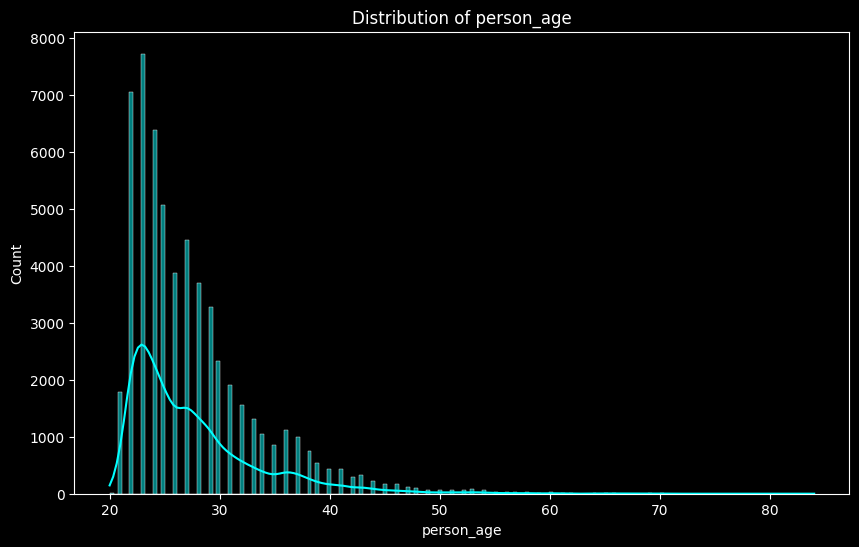

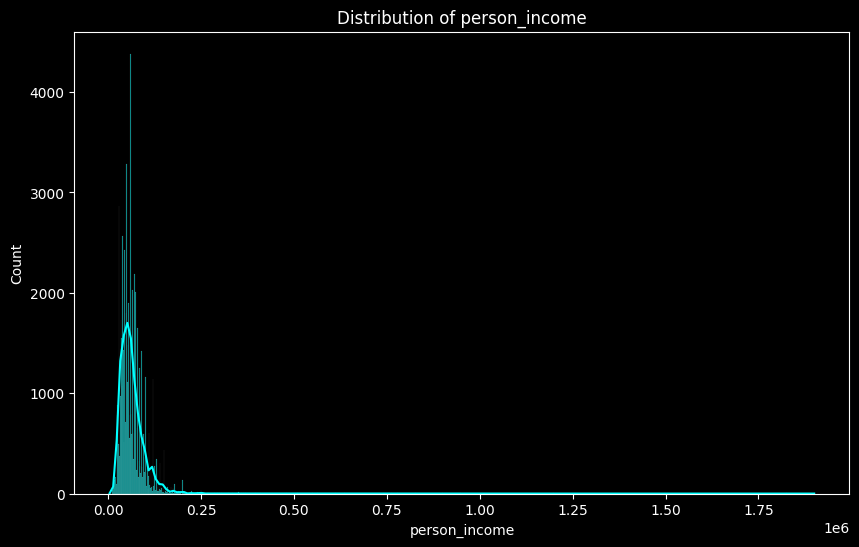

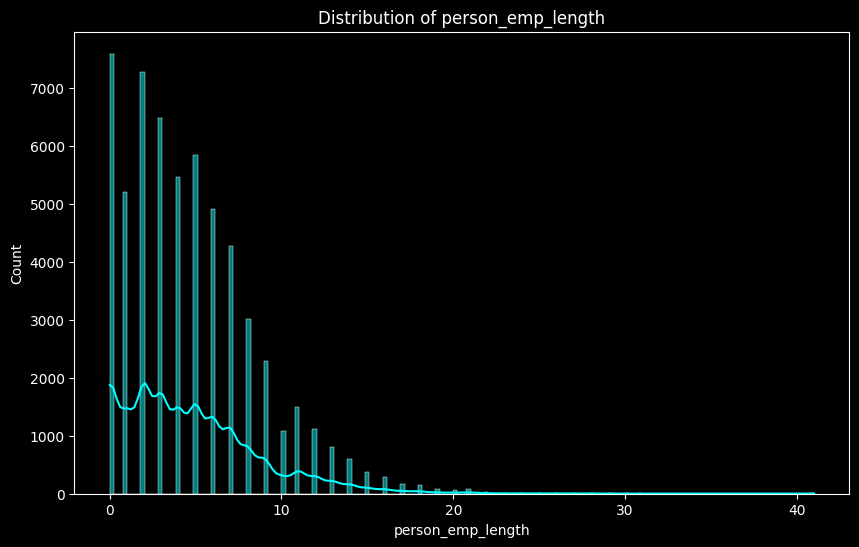

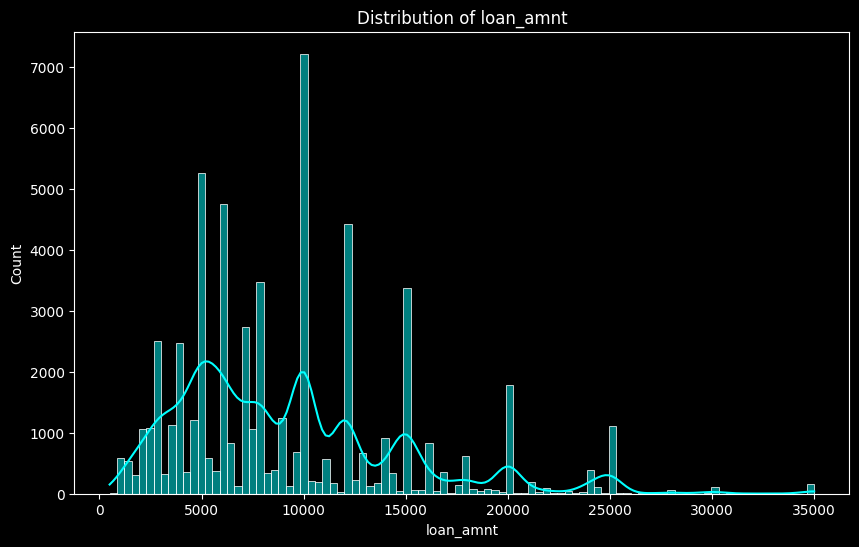

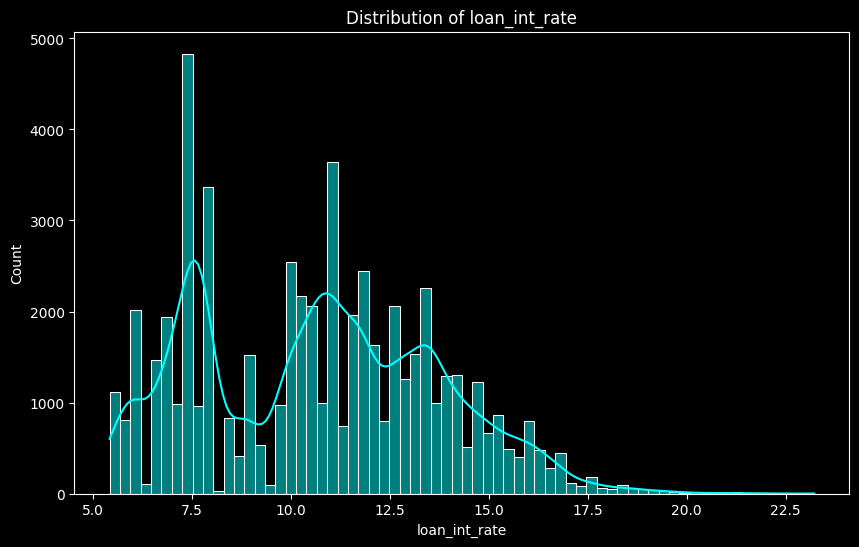

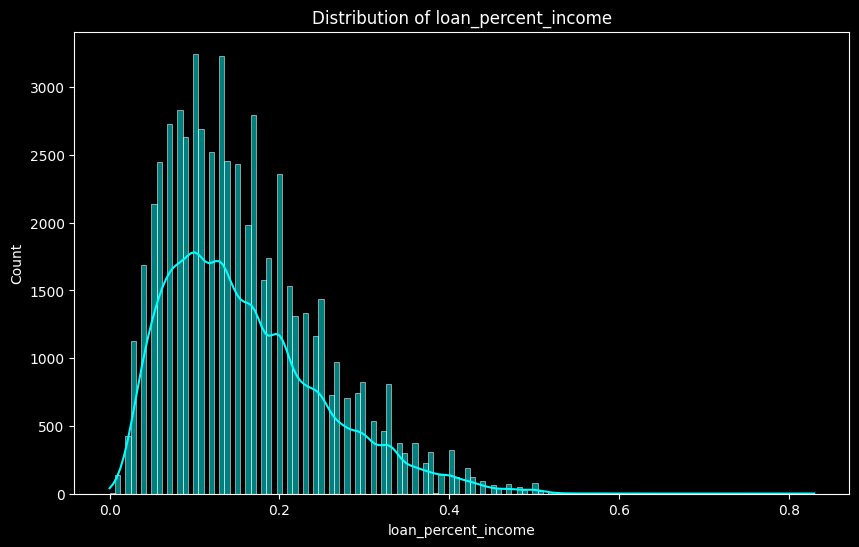

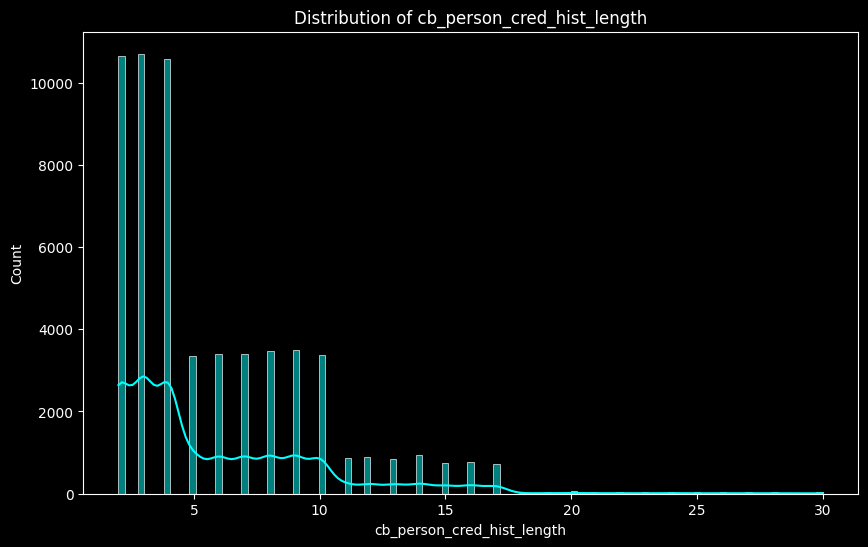

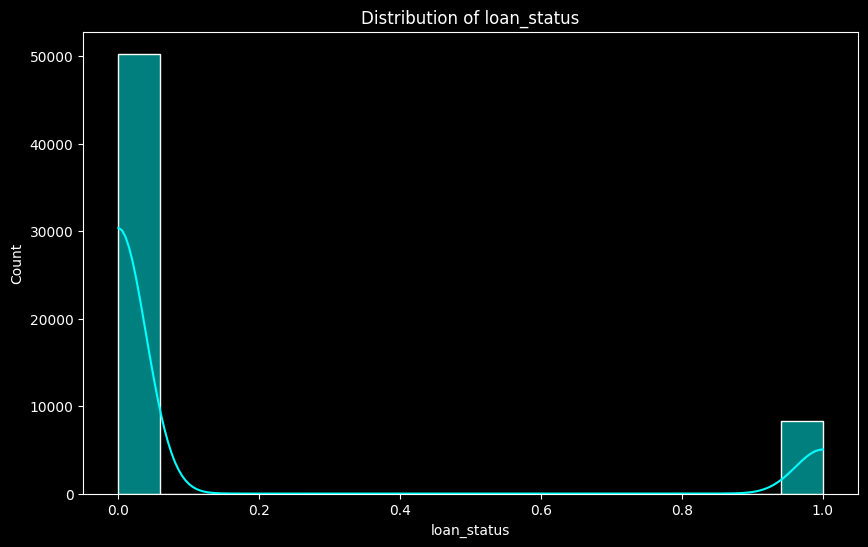

In [22]:
for col in num_col:
    plt.figure(figsize=(10, 6))
    plt.style.use('dark_background')
    sns.histplot(df[col], kde=True, color='cyan')
    plt.title(f'Distribution of {col}', color='white')
    plt.show()

Insights :
1. We have a pretty right skewed data distribution in the numerical column
2. Outliers are present.
3. Customer Age :
    - The majority of loan request seems to be in young adult groups with roughly around 20 - 35 years old
    - The distribution could suggest that the loan is appealing or targeted to the younger customer demographic, possibly a recent graduates or early in their careers.
4. Customer Income :
    - The minimum customer income is 4200 and the maximum is 1900000
    - The median income is 58000
    - From the chart it seems the loan request are majority from mid to lower income person.
5. Person Employment Length :
    - Majority of the customers are early on their careers around 0 to 5 years.
    - There is one anomaly with emoloyment length of 123 years.
6. Loan Amount:
    - Average customers ask a loan amount about 9000 dollars
    - Majority ask a loan amount of around 5000 - 15000 dollars
7. Loan Interest Rate :
    - The distribution has multiple peaks, suggesting different tiers or categories of interest rates.
    - The most common interest rate appears to be around 7.5%, with the highest bar on the chart.
8. Loan to Income Ratio :
    - Majority of customers have a loan ratio of 20% and lower to their income.
9. Credit History Length :
    - Majority of customers have a credit history length of less then 5 years.
    - There are a small group of customers that have a credit history for more than 10 years.
10. Loan Status :
    - Majority around 80% more got approved (0).


### 2.2.2 Categorical Column Count

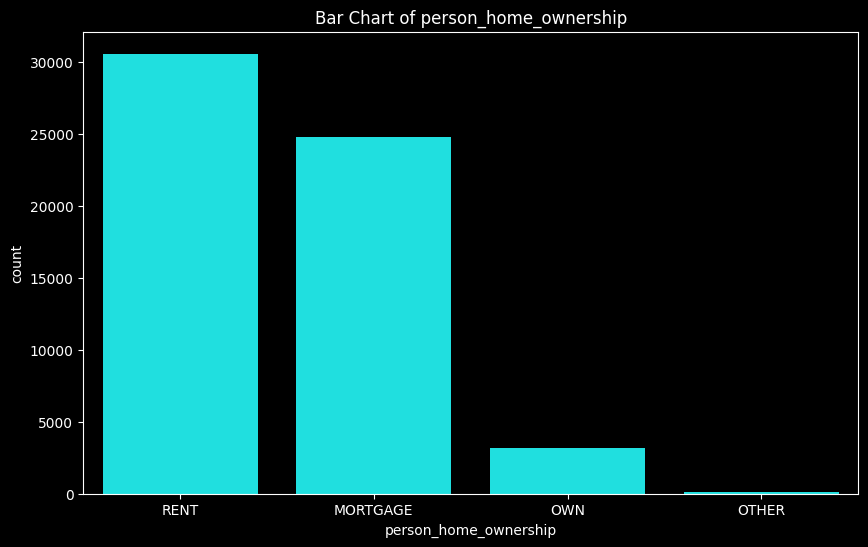

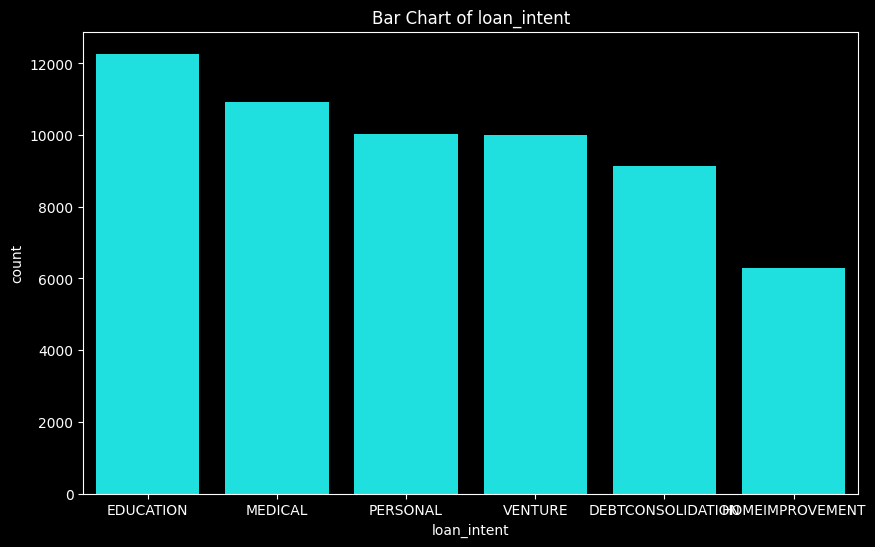

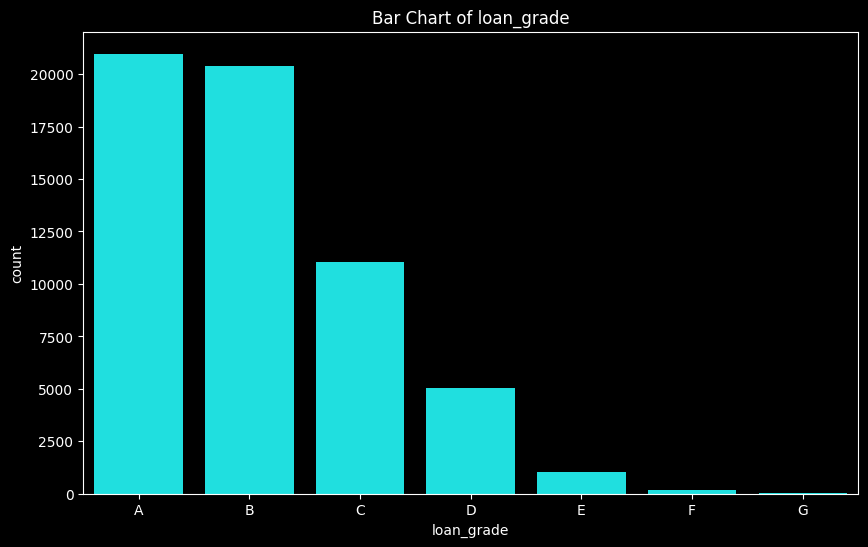

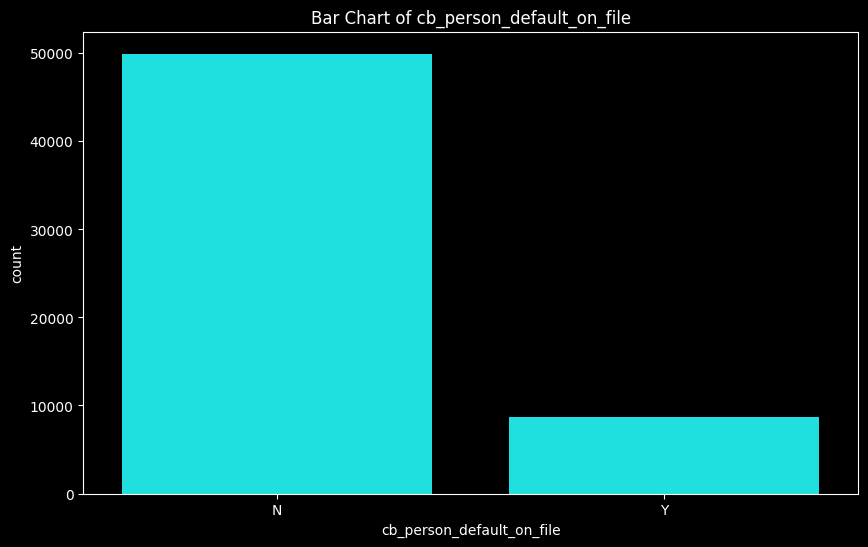

In [23]:
for col in cat_col:
    plt.figure(figsize=(10, 6))
    plt.style.use('dark_background')
    sorted_categories = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=sorted_categories, color='cyan')
    plt.title(f'Bar Chart of {col}', color='white')
    plt.show()

insights:
1. Home Ownership:
    - The majority of people are renter, and followed by person who have mortgages.
    - The Own category is much smaller than the Rent and Mortgage might indicate the high value of property or economic factors.
2. Loan Intent:
    - The largest number of loans are taken for "EDUCATION" purposes. This could suggests a strong focus on investing in education and skills development.
    - The second highest category is "MEDICAL" loans, highlighting the significant financial burden of healthcare costs on individuals.
3. Most people choose loan grade A and B then the rest of the grade.
4. Majority of people doesn't default on the file or previous loan.

## 2.2 Finding insights

In [24]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_income_ratio
0,0,37,35000,RENT,0.0000,EDUCATION,B,6000,11.4900,0.1700,N,14,0,17.1429
1,1,22,56000,OWN,6.0000,MEDICAL,C,4000,13.3500,0.0700,N,2,0,7.1429
2,2,29,28800,OWN,8.0000,PERSONAL,A,6000,8.9000,0.2100,N,10,0,20.8333
3,3,30,70000,RENT,14.0000,VENTURE,B,12000,11.1100,0.1700,N,5,0,17.1429
4,4,22,60000,RENT,2.0000,MEDICAL,A,6000,6.9200,0.1000,N,3,0,10.0000


In [25]:
def create_pivot(data, feature):
    df_counts = data[feature].value_counts().reset_index()
    df_counts.columns = [feature, 'Total']

    df_counts['%'] = (df_counts['Total'] / df_counts['Total'].sum() * 100).round(1)

    df_counts.loc['Total'] = df_counts[['Total', '%']].sum()
    df_counts.at['Total', feature] = 'Total'

    return df_counts

> 1. What are the key factors that increase the likelihood of a customer defaulting on a loan?

In [26]:
df.groupby('cb_person_default_on_file')['person_income'].agg(['mean', 'median', 'min', 'max'])

,mean,median,min,max
cb_person_default_on_file,,,,
N,64606.4859,59000.0000,4200,1839784
Y,60819.0949,54000.0000,5000,1900000


<Axes: xlabel='person_age', ylabel='person_income'>

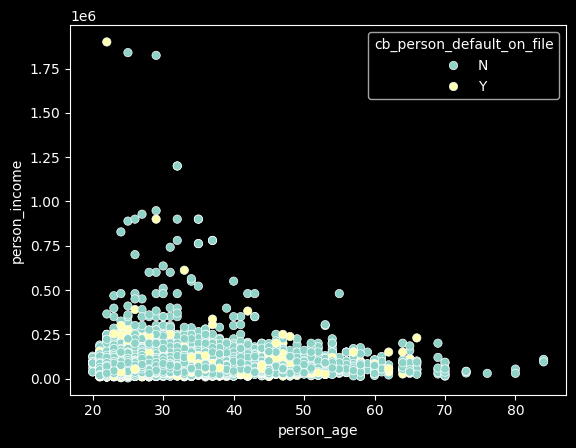

In [27]:
sns.scatterplot(data=df, x='person_age', y='person_income', hue='cb_person_default_on_file')

It seems the person income and person age doesn't really affect the default on the credit.

In [28]:
df.pivot_table(index='cb_person_default_on_file', columns=['person_home_ownership'], aggfunc='size', fill_value=0)

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
cb_person_default_on_file,,,,
N,22160,74,2652,25055
Y,2661,15,486,5539


Most of the people that are default are whom **rent** and **mortgage** for their home ownership. Let's do a statistical test whether the home ownership status independently associate with default.

H0 : Person default status and home ownership status are independent
<br>
H1 : Person default status and home ownership status are not independent

In [29]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['cb_person_default_on_file'], df['person_home_ownership'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:
    result = "Reject the null hypothesis (H₀): There is a significant association between default status and home ownership."
else:
    result = "Fail to reject the null hypothesis (H₀): There is no significant association between default status and home ownership."

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(result)

Chi-Square Statistic: 592.7146659656457
P-value: 3.8259508612295387e-128
Reject the null hypothesis (H₀): There is a significant association between default status and home ownership.


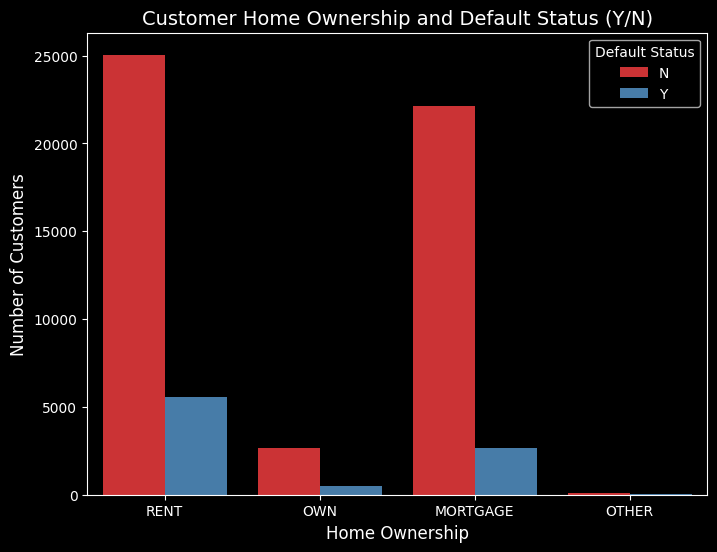

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='person_home_ownership', hue='cb_person_default_on_file', palette='Set1')

plt.title('Customer Home Ownership and Default Status (Y/N)', fontsize=14)
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Default Status')
plt.show()

The result is there i a significant association between home ownership and default status, but we cannot define the home ownership is the cause. Let's investigate further.

In [31]:
df.pivot_table(index='cb_person_default_on_file', columns=['loan_intent'], aggfunc='size', fill_value=0)

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
cb_person_default_on_file,,,,,,
N,7840,10402,5206,9341,8536,8616
Y,1293,1869,1074,1592,1479,1394


It seems the number of default between loan intention is evenly distributed, but mostly are for **education**. Let's do a statiscal test to make sure whether loan intent associate with a person default.

H0 : Person default status and loan intention are independent
<br>
H1 : Person default status and loan intention are not independent

In [32]:
contingency_loanintent = pd.crosstab(df['cb_person_default_on_file'], df['loan_intent'])

chi2, p, dof, expected = chi2_contingency(contingency_loanintent)

if p < 0.05:
    result = "Reject the null hypothesis (H₀): There is a significant association between default status and loan intent."
else:
    result = "Fail to reject the null hypothesis (H₀): There is no significant association between default status and loan intent."

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(result)

Chi-Square Statistic: 37.6087485635944
P-value: 4.5214537013524837e-07
Reject the null hypothesis (H₀): There is a significant association between default status and loan intent.


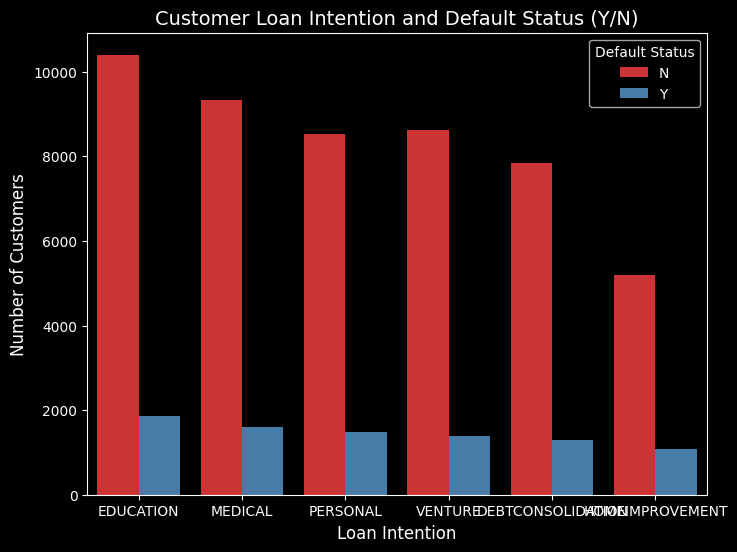

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_intent', hue='cb_person_default_on_file', palette='Set1')

plt.title('Customer Loan Intention and Default Status (Y/N)', fontsize=14)
plt.xlabel('Loan Intention', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Default Status')
plt.show()

In [34]:
df.groupby('cb_person_default_on_file')['loan_int_rate'].agg(['mean', 'median'])

,mean,median
cb_person_default_on_file,,
N,10.0421,10.2500
Y,14.3261,13.9900


The table show that the person whom default has a higher average of interest rate in their loans. let's do a mann-whitney test to see if there are significant differences.

H0: No significant difference in loan interest rates between defaulted and non-defaulted customers.
<br>
H1: There is a significant difference in loan interest rates between defaulted and non-defaulted customers.

In [35]:
from scipy.stats import mannwhitneyu

defaulted = df[df['cb_person_default_on_file'] == 'Y']['loan_int_rate']
not_defaulted = df[df['cb_person_default_on_file'] == 'N']['loan_int_rate']

u_stat, p_val = mannwhitneyu(defaulted, not_defaulted)

if p_val < 0.05:
    result = "Reject the null hypothesis: There is a significant difference in loan interest rates between defaulted and non-defaulted customers."
else:
    result = "Fail to reject the null hypothesis: No significant difference in loan interest rates between defaulted and non-defaulted customers."

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_val}")
print(result)

U-statistic: 395516281.5
P-value: 0.0
Reject the null hypothesis: There is a significant difference in loan interest rates between defaulted and non-defaulted customers.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


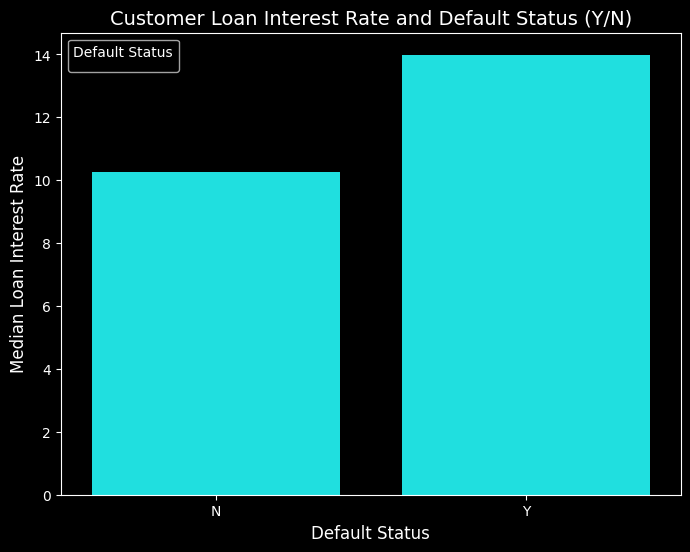

In [36]:
median_ratio = df.groupby('cb_person_default_on_file')['loan_int_rate'].median().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=median_ratio, x='cb_person_default_on_file', y='loan_int_rate', color='cyan')

plt.title('Customer Loan Interest Rate and Default Status (Y/N)', fontsize=14)
plt.xlabel('Default Status', fontsize=12)
plt.ylabel('Median Loan Interest Rate', fontsize=12)
plt.legend(title='Default Status')
plt.show()

In [37]:
df.groupby('cb_person_default_on_file')['loan_int_rate'].agg(['mean', 'median'])

,mean,median
cb_person_default_on_file,,
N,10.0421,10.2500
Y,14.3261,13.9900


In [38]:
df.groupby('cb_person_default_on_file')['loan_income_ratio'].median().reset_index()

,cb_person_default_on_file,loan_income_ratio
0,N,14.0000
1,Y,15.2617


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


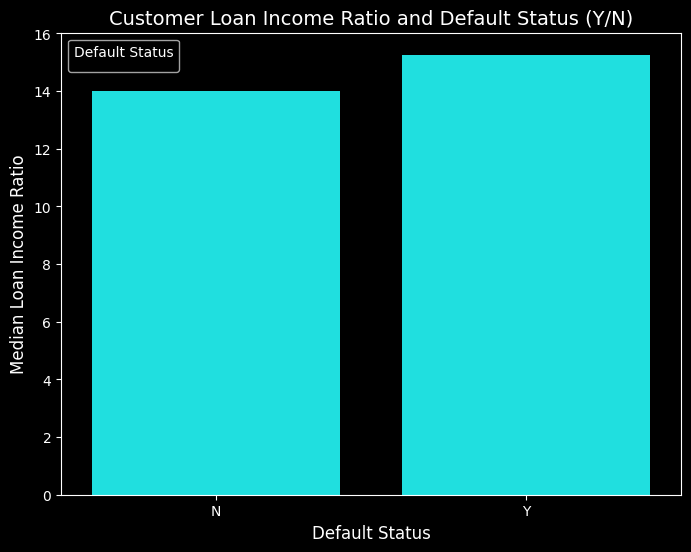

In [39]:
median_ratio = df.groupby('cb_person_default_on_file')['loan_income_ratio'].median().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=median_ratio, x='cb_person_default_on_file', y='loan_income_ratio', color='cyan')

plt.title('Customer Loan Income Ratio and Default Status (Y/N)', fontsize=14)
plt.xlabel('Default Status', fontsize=12)
plt.ylabel('Median Loan Income Ratio', fontsize=12)
plt.legend(title='Default Status')
plt.show()

In [40]:
d_y = df[df['cb_person_default_on_file'] == 'Y']['loan_income_ratio']
d_n = df[df['cb_person_default_on_file'] == 'N']['loan_income_ratio']

u_stat, p_val = mannwhitneyu(d_y, d_n)

if p_val < 0.05:
    result = "Reject the null hypothesis: There is a significant difference in loan to income ratio between defaulted and non-defaulted customers."
else:
    result = "Fail to reject the null hypothesis: No significant difference in loan to income ratio between defaulted and non-defaulted customers."

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_val}")
print(result)

U-statistic: 232590855.5
P-value: 7.344019899471856e-26
Reject the null hypothesis: There is a significant difference in loan to income ratio between defaulted and non-defaulted customers.


So the data shows there are significant difference in interest rate and also loan to income ratio to a person default or not. The median show that a higher interest rate and loan to income ratio is more associated to the defaulters.

        So the conclusion it that the home ownership status, the loan intention, interest rate and loan to income ratio play a role in a likelihood of a person deafult on their credit.

> 2. Which loan intentions show the highest likelihood of default and why?

We know previously that Education has the most defaulters than the other loan intention.

In [41]:
df.pivot_table(index='cb_person_default_on_file', columns=['loan_intent'], aggfunc='size', fill_value=0)

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
cb_person_default_on_file,,,,,,
N,7840,10402,5206,9341,8536,8616
Y,1293,1869,1074,1592,1479,1394


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


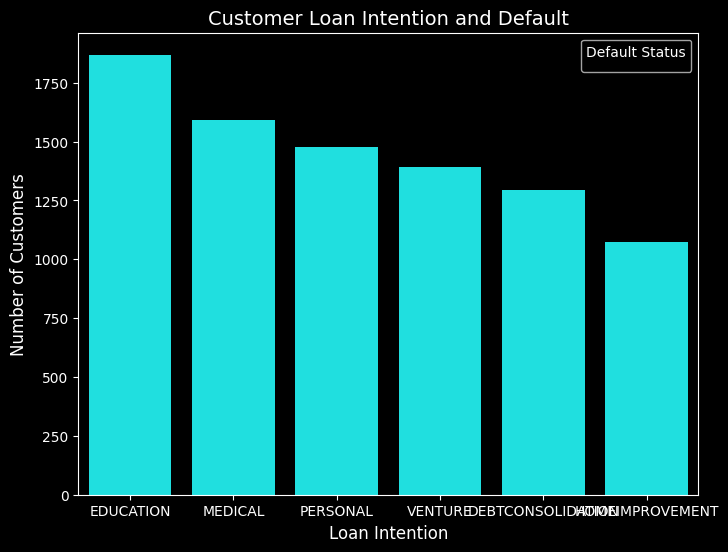

In [42]:
default_intent = df[df['cb_person_default_on_file'] == "Y"]

counts = default_intent['loan_intent'].value_counts()
sort_counts = counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.countplot(data=default_intent, x='loan_intent', color='cyan', order=sort_counts.index)

plt.title('Customer Loan Intention and Default', fontsize=14)
plt.xlabel('Loan Intention', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Default Status')
plt.show()

In [43]:
create_pivot(default_intent, 'loan_intent')

,loan_intent,Total,%
0,EDUCATION,1869.0000,21.5000
1,MEDICAL,1592.0000,18.3000
2,PERSONAL,1479.0000,17.0000
3,VENTURE,1394.0000,16.0000
4,DEBTCONSOLIDATION,1293.0000,14.9000
5,HOMEIMPROVEMENT,1074.0000,12.3000
Total,Total,8701.0000,100.0000


Out of 8701 person, 21.5% of them which is 1869 are asking a loan for their education purpose. Let's dive deep the characteristics of persons whom the loan intention is Education.

In [44]:
default_edu = default_intent[default_intent['loan_intent'] == 'EDUCATION']
default_edu.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1869.0000,29852.6715,17071.4890,8.0000,14859.0000,30162.0000,44719.0000,58640.0000
person_age,1869.0000,26.4880,5.5734,21.0000,23.0000,24.0000,29.0000,58.0000
person_income,1869.0000,61270.6886,51445.7938,5000.0000,40000.0000,55000.0000,72000.0000,1900000.0000
person_emp_length,1869.0000,4.0289,3.4151,0.0000,1.0000,3.0000,6.0000,29.0000
loan_amnt,1869.0000,9128.8657,5723.5439,1000.0000,5000.0000,8000.0000,12000.0000,35000.0000
loan_int_rate,1869.0000,14.2111,1.4407,7.8800,13.2200,13.8500,14.9600,21.7400
loan_percent_income,1869.0000,0.1626,0.0928,0.0000,0.0900,0.1500,0.2100,0.5000
cb_person_cred_hist_length,1869.0000,5.2311,3.6640,2.0000,3.0000,4.0000,7.0000,30.0000
loan_status,1869.0000,0.1932,0.3949,0.0000,0.0000,0.0000,0.0000,1.0000
loan_income_ratio,1869.0000,16.4170,10.3118,0.0789,9.2105,14.5455,21.4286,189.3939


In [45]:
default_edu['person_home_ownership'].value_counts(normalize=True)

person_home_ownership
RENT       0.6356
MORTGAGE   0.3055
OWN        0.0583
OTHER      0.0005
Name: proportion, dtype: float64

From the description we know that the median person whom the loan intention are for **education** are:
- Have a median age of 24
- Have a median income of 55000 dollar/year
- Have been worked for 3 year(median)
- Have a median loan to income ratio of 14.5%
- And about 63% of them have a rent for their home ownership status.

With this description we can conclude that the majority of them are young adult and still early in their career, with relatively low income per year, therefor they have a lot of bills to paid including rent, education, and others.

> 3. Does a longer employment history significantly reduce default risk? Should we prioritize customers with longer employment histories?

To answer this let's do a statictical test to see if there are significant difference between person whom default or not in their employment length.

Man-whitney U test

H0: No significant difference in employment length between defaulted and non-defaulted customers.
<br>
H1: There is a significant difference in employment length between defaulted and non-defaulted customers.

In [46]:
emp_y = df[df['cb_person_default_on_file'] == 'Y']['person_emp_length']
emp_n = df[df['cb_person_default_on_file'] == 'N']['person_emp_length']

u_stat, p_val = mannwhitneyu(emp_y, emp_n)

if p_val < 0.05:
    result = "Reject the null hypothesis: There is a significant difference in employment length between defaulted and non-defaulted customers."
else:
    result = "Fail to reject the null hypothesis: No significant difference in employment length between defaulted and non-defaulted customers."

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_val}")
print(result)

U-statistic: 195890141.5
P-value: 3.696161039627034e-49
Reject the null hypothesis: There is a significant difference in employment length between defaulted and non-defaulted customers.


The mann-whitney u test shows there is a significant differences between person that default and not in their employment length.

In [47]:
df.groupby('cb_person_default_on_file')['person_emp_length'].agg(['mean', 'median'])

,mean,median
cb_person_default_on_file,,
N,4.7886,4.0000
Y,4.1707,3.0000


<Axes: xlabel='person_age', ylabel='person_emp_length'>

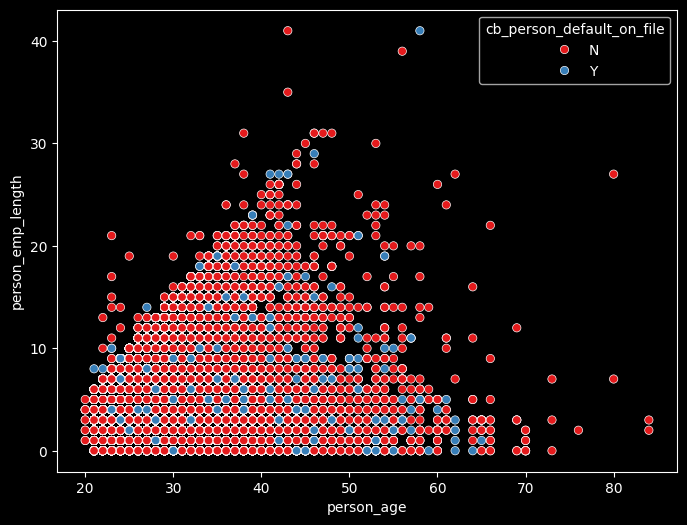

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='person_age', y='person_emp_length', hue='cb_person_default_on_file', palette='Set1')


From the median and the scatterplot however, it seems there is no difference in the employment length incomes to the person default or not.

> 4. How does the length of a customer’s credit history impact their likelihood of approval and default?

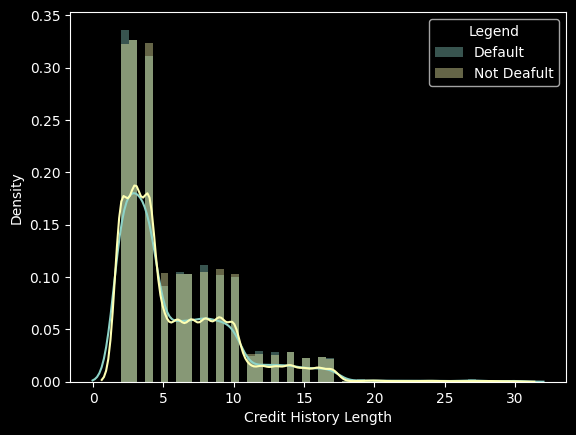

In [49]:
cred_len_y = df[df['cb_person_default_on_file'] == 'Y']['cb_person_cred_hist_length']
cred_len_n = df[df['cb_person_default_on_file'] == 'N']['cb_person_cred_hist_length']

sns.distplot(cred_len_y, label= 'Default')
sns.distplot(cred_len_n, label= 'Not Deafult')
plt.legend(title='Legend')
plt.xlabel('Credit History Length')
plt.show()

In [50]:
df.groupby('cb_person_default_on_file')['cb_person_cred_hist_length'].agg(['mean', 'median'])

,mean,median
cb_person_default_on_file,,
N,5.8055,4.0000
Y,5.8607,4.0000


In [51]:
df.groupby('loan_status')['cb_person_cred_hist_length'].agg(['mean', 'median'])

,mean,median
loan_status,,
0,5.8186,4.0000
1,5.7836,4.0000


From the data above we know that the person credit history length doesn't seem to differ in whether they defaut or the loan is not approved.

> 5. Does having a previous default on file heavily influence the likelihood of loan default, and should we impose stricter requirements for such customers?

In [52]:
pivot_counts = df.pivot_table(index='cb_person_default_on_file', columns=['loan_status'], aggfunc='size', fill_value=0)
pivot_counts['Total'] = pivot_counts.sum(axis=1)

percentage = pivot_counts.div(pivot_counts['Total'], axis=0) * 100

result = pivot_counts.copy()
result_percentage = percentage.rename(columns={0: 'Percentage_not_default', 1: 'Percentage_default'})
result = pd.concat([result, result_percentage], axis=1)

result

loan_status,0,1,Total,Percentage_not_default,Percentage_default,Total
cb_person_default_on_file,,,,,,
N,44192,5749,49941,88.4884,11.5116,100.0000
Y,6101,2600,8701,70.1184,29.8816,100.0000


The data shows that that about 30% of persons previously default is also default on the loan status. Meanwhile, persons whom previously not default about 11.5% of them are defaulting.

This result is the reason that its important to leverage machine learning to minimize this risk of giving the loan to a person who have the potential to default in the future. Thats why we must minimize the 11.5% and 30% above.

> 6. Does the loan amount differ between person whom default and not?

In [53]:
df.groupby('cb_person_default_on_file')['loan_amnt'].agg(['mean', 'median'])

,mean,median
cb_person_default_on_file,,
N,9170.3106,8000.0000
Y,9485.9694,8000.0000


In [54]:
df.groupby('loan_status')['loan_amnt'].agg(['mean', 'median'])

,mean,median
loan_status,,
0,8888.7058,8000.0000
1,11195.6186,10000.0000


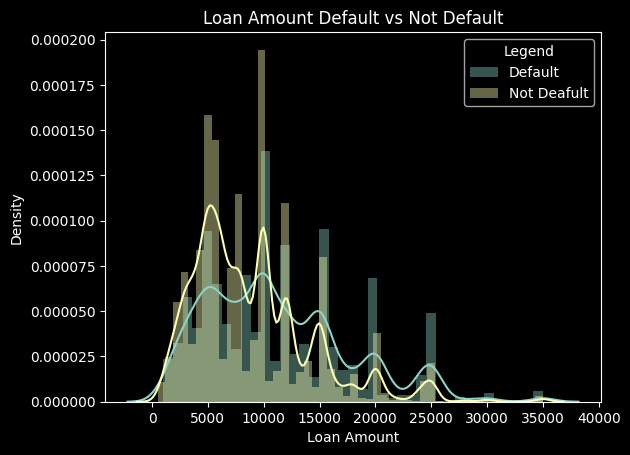

In [55]:
cred_len_y = df[df['loan_status'] == 1]['loan_amnt']
cred_len_n = df[df['loan_status'] == 0]['loan_amnt']

sns.distplot(cred_len_y, label= 'Default')
sns.distplot(cred_len_n, label= 'Not Deafult')
plt.title('Loan Amount Default vs Not Default')
plt.legend(title='Legend')
plt.xlabel('Loan Amount')
plt.show()

We can see that the median loan amount of people who default on their loan status is higher than the non default, 10000 dollar versus 8000 dollar.

# 3. Machine Learning Building

The goal of building this machine learning model is to accurately predict whether a customer will default on their loan, allowing more informed lending decisions and reducing financial risk. As the stakeholder, I have set a business threshold where we are willing to accept a maximum of **10% false positives—customers** who are not defaulters but are flagged as such. 

This approach **prioritizes recall as the primary evaluation metric, aiming to catch as many potential defaulters as possible, thereby minimizing the risk of lending to those likely to default**. However, this comes with a trade-off: focusing on high recall may lower precision, meaning that while more defaulters are identified, some eligible customers might be wrongly flagged. Striking the right balance between recall and precision is essential to achieving a cost-effective and responsible lending strategy, where financial security is maintained while still approving a large portion of legitimate borrowers.

**Recall Formula**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$


- **True Positives (TP)**: Cases where the model correctly predicted the customer as a defaulter.
- **False Negatives (FN)**: Cases where the model incorrectly predicted the customer as not a defaulter, but they actually defaulted.


In [56]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from imblearn.pipeline import Pipeline
from skopt import BayesSearchCV
import category_encoders as ce
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay, confusion_matrix, accuracy_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import shap
import pickle

RANDOM_STATE = 14

## 3.1 Data Preprocessing

In [57]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_income_ratio
0,0,37,35000,RENT,0.0000,EDUCATION,B,6000,11.4900,0.1700,N,14,0,17.1429
1,1,22,56000,OWN,6.0000,MEDICAL,C,4000,13.3500,0.0700,N,2,0,7.1429
2,2,29,28800,OWN,8.0000,PERSONAL,A,6000,8.9000,0.2100,N,10,0,20.8333
3,3,30,70000,RENT,14.0000,VENTURE,B,12000,11.1100,0.1700,N,5,0,17.1429
4,4,22,60000,RENT,2.0000,MEDICAL,A,6000,6.9200,0.1000,N,3,0,10.0000


In [58]:
X = df.drop(columns=['id', 'loan_percent_income', 'loan_status'])
y = df['loan_status']
X.shape, y.shape

((58642, 11), (58642,))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    stratify=y,
    test_size=0.25,
    random_state=RANDOM_STATE
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43981, 11), (14661, 11), (43981,), (14661,))

In [60]:
y.value_counts(normalize=True)

loan_status
0   0.8576
1   0.1424
Name: proportion, dtype: float64

In [61]:
cat_col = []
num_col = []
for column in X.columns:
    if X[column].dtype == object:
        cat_col.append(column)
    else:
        num_col.append(column)

display(cat_col, num_col)

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length',
 'loan_income_ratio']

In [62]:
preprocess = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), cat_col),
    ('scaler', RobustScaler(), num_col)

], remainder='passthrough')

In [63]:
logreg = LogisticRegression(random_state=RANDOM_STATE)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
rf = RandomForestClassifier(random_state=RANDOM_STATE)
ada = AdaBoostClassifier(tree, random_state=RANDOM_STATE)
gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)
xgbc = XGBClassifier()
svm = SVC(random_state=RANDOM_STATE)

In [64]:
# train and validating
models = [logreg, knn, tree, rf, ada, gbc, xgbc, svm]
model_name = []
score = []
train_score = []
std_value = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ("transformer", preprocess),
        ("model", i)
    ])
    
    # Cross validation
    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring="recall",
        error_score="raise"
    )

    print(model_cv, i)
    
    # Evaluate
    score.append(model_cv)
    train_score.append(model_cv.mean())
    std_value.append(model_cv.std())
    model_name.append(i.__class__.__name__)

# Store results    
benchmark_model_train = pd.DataFrame({
    "model":model_name,
    "train_recall":train_score,
    "std":std_value
}).sort_values(by="train_recall", ascending=False)

benchmark_model_train

[0.53790902 0.53674121 0.54073482 0.54153355 0.5179569 ] LogisticRegression(random_state=14)
[0.63128492 0.65175719 0.63897764 0.65734824 0.64006385] KNeighborsClassifier()
[0.69832402 0.71565495 0.70766773 0.71325879 0.70151636] DecisionTreeClassifier(random_state=14)
[0.70311253 0.71645367 0.70127796 0.69808307 0.69592977] RandomForestClassifier(random_state=14)
[0.71109338 0.71325879 0.71325879 0.7172524  0.69992019] AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=14),
                   random_state=14)
[0.68954509 0.71325879 0.6956869  0.66932907 0.68475658] GradientBoostingClassifier(random_state=14)
[0.72226656 0.735623   0.72364217 0.72603834 0.7254589 ] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_pol

,model,train_recall,std
6,XGBClassifier,0.7266,0.0047
4,AdaBoostClassifier,0.7110,0.0059
2,DecisionTreeClassifier,0.7073,0.0066
3,RandomForestClassifier,0.7030,0.0072
5,GradientBoostingClassifier,0.6905,0.0143
7,SVC,0.6608,0.0054
1,KNeighborsClassifier,0.6439,0.0094
0,LogisticRegression,0.5350,0.0087


In [65]:
# check on test
models = [logreg, knn, tree, rf, ada, gbc, xgbc, svm]
test_score = []
model_name = []

for i in models:
    model_pipeline = Pipeline([
        ("transformer", preprocess),
        ("model", i)
    ])

    # fitting
    model_pipeline.fit(X_train, y_train)

    # predict
    y_pred_test = model_pipeline.predict(X_test)

    # evaluate
    score = recall_score(y_test, y_pred_test)
    test_score.append(score)
    model_name.append(i.__class__.__name__)
    
# Store Result
benchmark_model_test = pd.DataFrame({
"model":model_name,
"test_recall":test_score
}).sort_values(by="test_recall", ascending=False)

benchmark_model_test

,model,test_recall
6,XGBClassifier,0.7331
4,AdaBoostClassifier,0.7216
2,DecisionTreeClassifier,0.7178
3,RandomForestClassifier,0.7168
5,GradientBoostingClassifier,0.7005
7,SVC,0.6766
1,KNeighborsClassifier,0.6488
0,LogisticRegression,0.5352


Test Result
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12574
           1       0.89      0.73      0.81      2087

    accuracy                           0.95     14661
   macro avg       0.93      0.86      0.89     14661
weighted avg       0.95      0.95      0.95     14661

ROC AUC Score: 0.8594


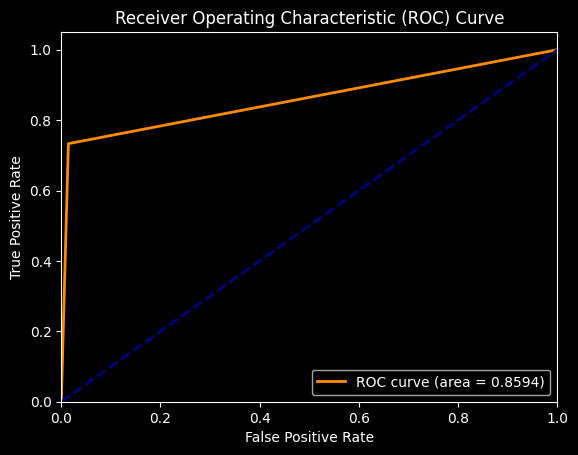

In [66]:
# Base on X_test

model_pipe_xgb = Pipeline([
    ("transformer", preprocess),
    ("model", xgbc)
])

# Fitting
model_pipe_xgb.fit(X_train, y_train)

# Predict and Evaluate
y_pred_xgbc = model_pipe_xgb.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_xgbc)

print('Test Result')
print(classification_report(y_test, y_pred_xgbc))
print(f"ROC AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbc)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'XGboost Baseline')

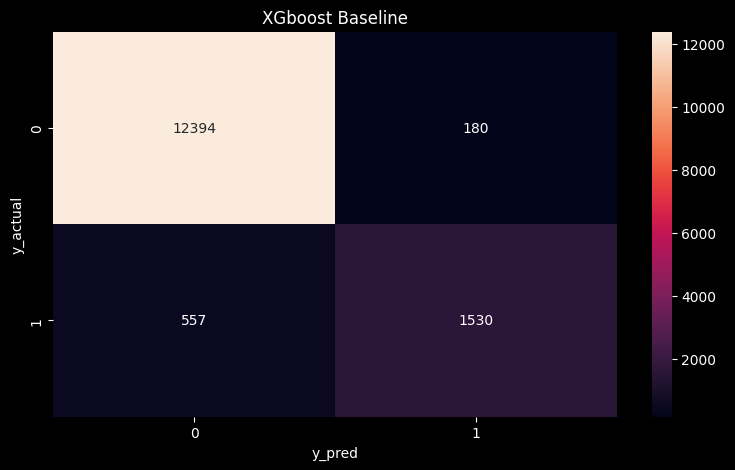

In [67]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,y_pred_xgbc), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('XGboost Baseline')

In [68]:
# Hyperparameter Tuning
model_pipe_xgb = Pipeline([
    ("transformer", preprocess),
    ("model", xgbc)
])

# Define hyperparameter space
param_grid = {
    'model__n_estimators': [100, 250, 500, 750, 1000, 1250, 1500],
    'model__learning_rate': [0.1, 0.2, 0.3],
    'model__max_depth': [3, 4, 5, 6, 7, 8, 9],
    'model__min_child_weight': [1, 3, 5, 7, 9],
    'model__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'model__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)

# Hyperparameter tuning
xgb_tuned = BayesSearchCV(
    model_pipe_xgb,
    search_spaces=param_grid,
    cv=skf,
    n_iter=50,
    scoring="recall",
    n_jobs=-1,
    error_score='raise',
    verbose=2,
    random_state=RANDOM_STATE
)

# Fit the model
xgb_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=14, shuffle=True),
              estimator=Pipeline(steps=[('transformer',
                                         ColumnTransformer(remainder='passthrough',
                                                           transformers=[('onehot',
                                                                          OneHotEncoder(drop='first'),
                                                                          ['person_home_ownership',
                                                                           'loan_intent',
                                                                           'loan_grade',
                                                                           'cb_person_default_on_file']),
                                                                         ('scaler',
                                                                          RobustScaler(),
                                                                          ['person_age',
                                                                           'person_income',
                                                                           'per...
              n_jobs=-1, random_state=14, scoring='recall',
              search_spaces={'model__colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                         1.0],
                             'model__gamma': [0, 0.1, 0.2, 0.3, 0.4],
                             'model__learning_rate': [0.1, 0.2, 0.3],
                             'model__max_depth': [3, 4, 5, 6, 7, 8, 9],
                             'model__min_child_weight': [1, 3, 5, 7, 9],
                             'model__n_estimators': [100, 250, 500, 750, 1000,
                                                     1250, 1500],
                             'model__subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
              verbose=2)

In [69]:
print("XGB")
print("best score :", xgb_tuned.best_score_)
print("best param :", xgb_tuned.best_params_)

XGB
best score : 0.7318740454219776
best param : OrderedDict({'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 4, 'model__min_child_weight': 9, 'model__n_estimators': 1250, 'model__subsample': 0.8})


In [70]:
xgb_tuning = xgb_tuned.best_estimator_

y_pred_xgbc_tuned = xgb_tuning.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_xgbc_tuned)

print('Test Result')
print(f"ROC AUC Score: {roc_auc:.4f}")
print(classification_report(y_test, y_pred_xgbc_tuned))

Test Result
ROC AUC Score: 0.8609
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12574
           1       0.88      0.74      0.80      2087

    accuracy                           0.95     14661
   macro avg       0.92      0.86      0.89     14661
weighted avg       0.95      0.95      0.95     14661



Text(0.5, 1.0, 'XGboost Hyperparameter Tuning')

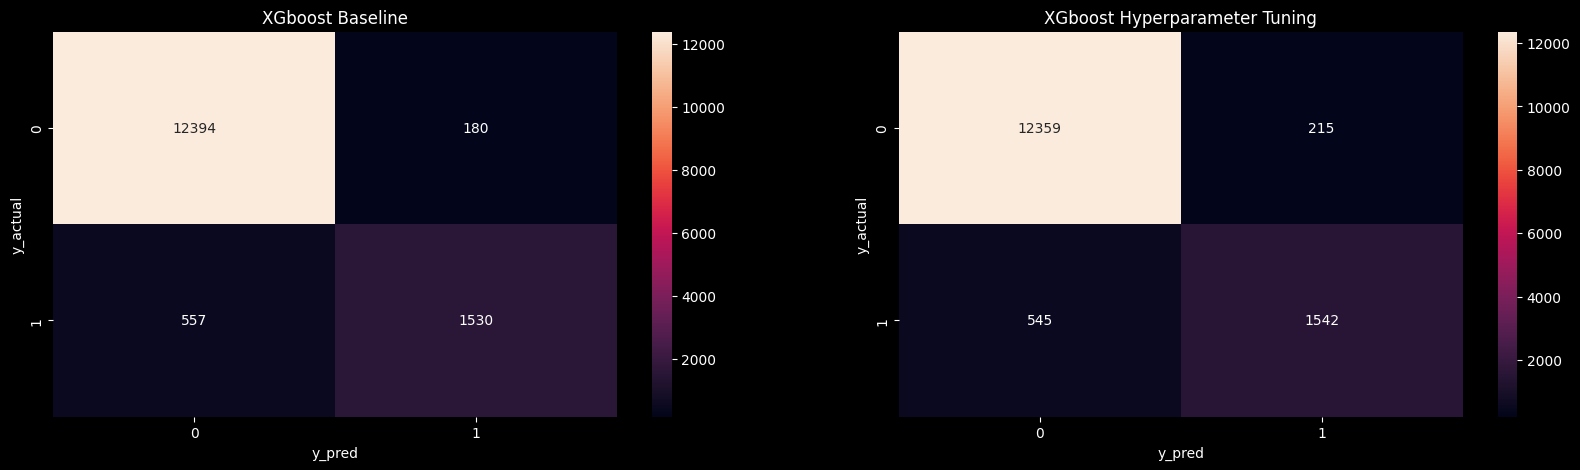

In [71]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,y_pred_xgbc), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('XGboost Baseline')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_xgbc_tuned), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('XGboost Hyperparameter Tuning')

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     12574
           1       0.65      0.84      0.73      2087

    accuracy                           0.91     14661
   macro avg       0.81      0.88      0.84     14661
weighted avg       0.93      0.91      0.92     14661

ROC AUC Score: 0.8826


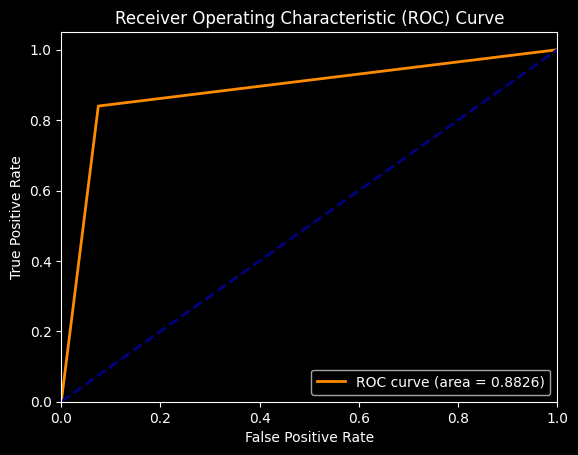

In [72]:
# Adjusting threshold for better recall

y_pred_proba = xgb_tuning.predict_proba(X_test)[:, 1]

threshold = 0.15
y_pred_custom_thresh = (y_pred_proba >= threshold).astype(int)


print(classification_report(y_test, y_pred_custom_thresh))

roc_auc = roc_auc_score(y_test, y_pred_custom_thresh)
print(f"ROC AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_custom_thresh)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'XGboost Threshold 0.15')

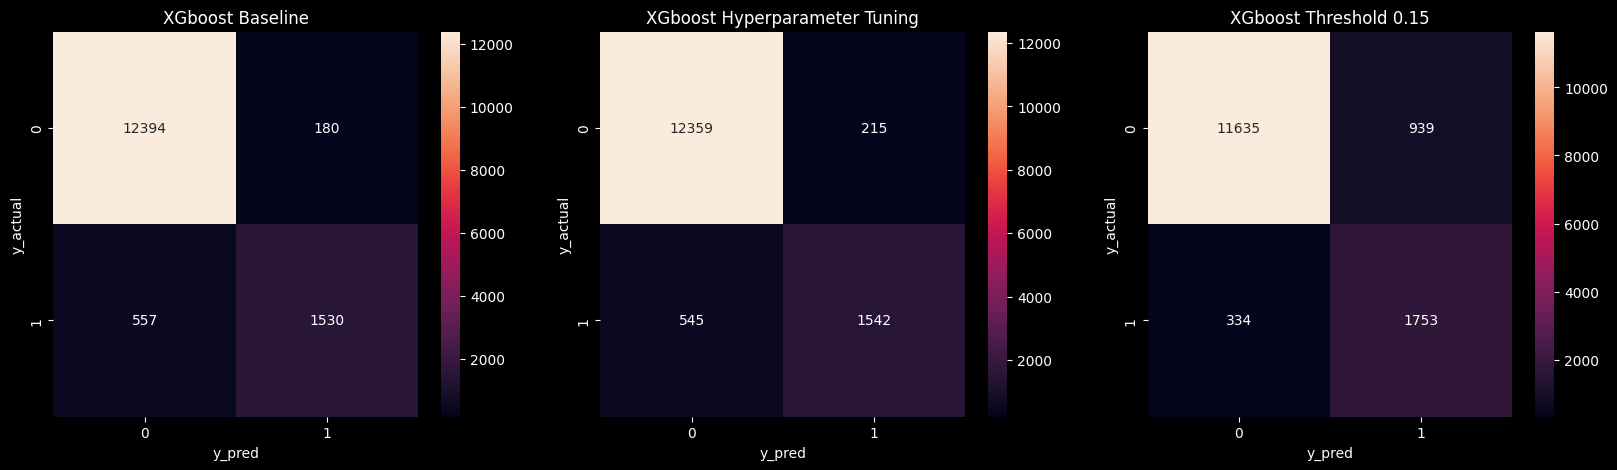

In [73]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred_xgbc), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('XGboost Baseline')

plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test,y_pred_xgbc_tuned), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('XGboost Hyperparameter Tuning')

plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test,y_pred_custom_thresh), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title(f'XGboost Threshold {threshold}')

## Summary

### **Confusion Matrix Summary and Threshold Adjustment to 0.15**
The three confusion matrices visualize the performance of an XGBoost model across three conditions: baseline, hyperparameter tuning, and a custom threshold of 0.15.

1. **XGBoost Baseline:**

- True Negatives (TN): 12,394
- False Positives (FP): 180
- False Negatives (FN): 557
- True Positives (TP): 1,530

>The baseline model performs reasonably well, but some defaulters are missed, which translates into potential financial risk. There are 557 customers who defaulted but were not flagged by the model.

2. **XGBoost with Hyperparameter Tuning:**

- True Negatives (TN): 12,359
- False Positives (FP): 215
- False Negatives (FN): 545
- True Positives (TP): 1,542

>After hyperparameter tuning, performance improved slightly, reducing the false negatives to 545. This means the model captures more defaulters, but the number of false positives increases marginally.

3. **XGBoost with Threshold Adjustment (0.15):**

- True Negatives (TN): 11,635
- False Positives (FP): 939
- False Negatives (FN): 334
- True Positives (TP): 1,753

>By lowering the decision threshold to 0.15, the model catches significantly more defaulters, reducing false negatives to 334 and increasing true positives to 1,753. This threshold adjustment is crucial because identifying defaulters is more important in this business context, even if it means rejecting a few more non-defaulters (939 false positives).

## Business Scenario

Let’s consider a business scenario where each defaulted loan costs the company $5,000 in lost principal, interest, and administrative costs. Without the model, suppose the company would lend to every applicant and experience a default rate of 15% (hypothetical). Assuming the company processes a new 10,000 loan applications, let’s break down the financial impact using percentages for easier understanding. The company processes 10,000 loan applications, and the key risks are lending to defaulters (False Negatives) and rejecting good customers (False Positives).

#### Without the Machine Learning Model:
- **Default Rate (Hypothetical)**: 15%
- **Number of Defaulters**: \( 10,000 \times 0.15 = 1,500 \)
- **Cost from lending to defaulters**: \( 1,500 \times 5,000 = 7,500,000 \) dollars

In this scenario, the company incurs a loss of **$7.5 million** from lending to defaulters.

#### With the Machine Learning Model at Threshold 0.15:

##### 1. **Cost of Missed Defaulters (False Negatives)**:
- The model misses **334 defaulters** out of 1,500 total defaulters, or **22.3%** of all defaulters.
- **Cost from missed defaulters**: \( 334 \times 5,000 = 1,670,000 \) dollars

##### 2. **Opportunity Cost from Rejecting Non-Defaulters (False Positives)**:
- The model incorrectly rejects **939 non-defaulters** out of 8,500 (non-defaulters), which is **11.0%** of all non-defaulters.
- Assuming each loan provides a **net profit of $2,000** (from interest and fees):
  - **Opportunity cost from rejecting non-defaulters**: \( 939 \times 2,000 = 1,878,000 \) dollars

##### 3. **Net Savings from Implementing the Model**:
- **Total loss without the model**: $7,500,000
- **Total cost after using the model**: \( 1,670,000 + 1,878,000 = 3,548,000 \) dollars
- **Savings**: \( 7,500,000 - 3,548,000 = 3,952,000 \) dollars

### Percentage Breakdown:

- **Without the model**: The company loses **100%** of the total cost, which is **$7,500,000**.
- **With the model** (Threshold 0.15):
  - Loss from missed defaulters (FN): **22.3%** of defaulters missed, leading to a loss of **$1,670,000**.
  - Opportunity cost from rejecting good customers (FP): **11.0%** of non-defaulters are wrongly rejected, causing a loss of **$1,878,000**.
  - **Total cost reduction**: After using the model, the company only incurs **47.3%** of the total loss it would have without the model.

#### Summary of Financial Impact

- **Without the model**: The business would lose **$7,500,000** from lending to defaulters.
- **With the model** (Threshold 0.15): The business incurs a total cost of **$3,548,000** ($1,670,000 from missed defaulters and $1,878,000 from rejecting good customers).
- **Net Savings**: By using the model, the company saves **$3,952,000**, or **52.7%** of the total loss.

### Formula Illustration

- **Cost from Missed Defaulters (False Negatives)**:
  $$
  \text{Cost from FN} = \frac{\text{Missed Defaulters}}{\text{Total Defaulters}} \times \text{Cost per Defaulter}
  $$

  $$
  \text{22.3\%} = \frac{334}{1,500}, \quad 1,670,000 = 334 \times 5,000
  $$

- **Opportunity Cost from False Positives**:
  $$
  \text{Cost from FP} = \frac{\text{False Positives}}{\text{Total Non-Defaulters}} \times \text{Profit per Loan}
  $$

  $$
  \text{11.0\%} = \frac{939}{8,500}, \quad 1,878,000 = 939 \times 2,000
  $$

- **Total Cost After Using the Model**:
  $$
  \text{Total Cost} = \text{Cost from FN} + \text{Cost from FP}
  $$

  $$
  3,548,000 = 1,670,000 + 1,878,000
  $$

- **Savings**:
  $$
  \text{Savings} = \text{Total Loss without Model} - \text{Total Cost after Model}
  $$

  $$
  3,952,000 = 7,500,000 - 3,548,000
  $$

### Conclusion

By lowering the threshold to 0.15, the company maximizes its ability to catch defaulters, resulting in **$3,952,000 saved**, which is **52.7%** of the potential loss without the machine learning model. This balance between catching defaulters (recall) and rejecting non-defaulters (precision) is key to minimizing financial risk.

# 4. Feature Importance and Explainable AI

In [74]:
final_model = xgb_tuning

# Getting feature names
features = list(preprocess.get_feature_names_out())
list_features = []

for feature in features:
    list_features.append("_".join(feature.split("_")[2:]))

# assign feature importance
imp = final_model.named_steps['model'].feature_importances_

# to dataframe

feature_imp = pd.DataFrame({
    "Importance":imp,
    "Feature":list_features
}).sort_values(by="Importance", ascending=False)
feature_imp

,Importance,Feature
10,0.2976,loan_grade_D
2,0.1346,person_home_ownership_RENT
1,0.0939,person_home_ownership_OWN
21,0.0520,loan_income_ratio
4,0.0518,loan_intent_HOMEIMPROVEMENT
9,0.0508,loan_grade_C
11,0.0429,loan_grade_E
7,0.0405,loan_intent_VENTURE
19,0.0360,loan_int_rate
3,0.0327,loan_intent_EDUCATION


PermutationExplainer explainer: 14662it [40:21,  6.04it/s]                            


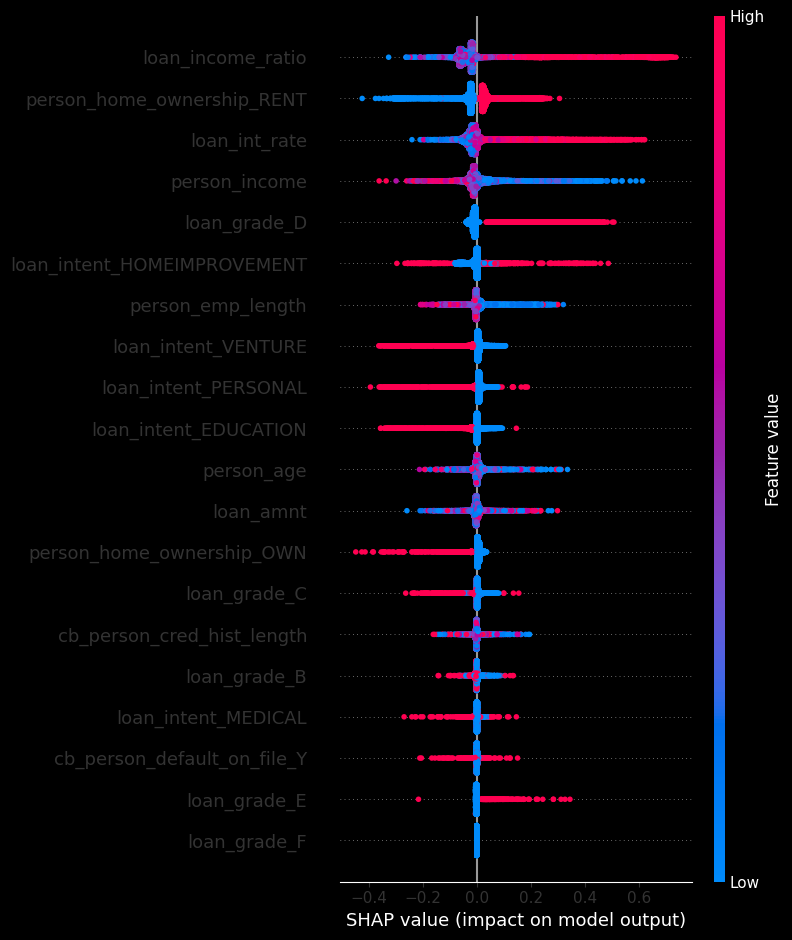

In [75]:
test_transformed = pd.DataFrame(final_model[0].transform(X_test), columns = list_features)

# Explainable AI Global
# explainer
explainer = shap.Explainer(
    final_model[-1].predict,
    final_model[0].transform(X_test)
)

shap_values = explainer(test_transformed)
shap.summary_plot(shap_values, test_transformed)

This SHAP summary plot provides a visual explanation of how different features in the dataset impact the output of your machine learning model, particularly focusing on which features push predictions towards higher or lower risk of loan default.

**Key Obeservation :**

1. **Loan to Income Ratio:**

    The loan_income_ratio has the largest impact on the model's predictions. Higher values (shown in red) push the prediction towards higher risk (positive SHAP values), meaning that customers with a **higher loan-to-income ratio are more likely to default**. Lower ratios (blue) decrease the risk of default.

2. **Home Ownership (RENT):**

    Customers who **rent** their homes (indicated by high feature values in red) are more **likely to default**, while owning a **home decreases the risk.**

3. **Loan Interest Rate:**

    **Higher loan_int_rate values push the prediction towards default** (positive SHAP values). Lower interest rates are associated with a lower likelihood of default, which makes sense since higher interest loans may place a greater financial burden on customers.

4. **Income:**

    Person_income has a slightly lower impact on model output compared to other features. Higher incomes (shown in red) generally reduce the risk of default, while **lower incomes increase the risk**.

5. **Loan Grade:**

    Loan grade D has a considerable impact. **Loans with grade D tend to push the prediction towards default**, while higher-quality grades like C and B reduce the likelihood of default.

In [76]:
pickle.dump(final_model, open("./loan_default_predictor.pkl", "wb"))

In [77]:
# pip freeze > requirements.txt